<a href="https://colab.research.google.com/github/yclipse/RTS_mapping/blob/main/plot_training_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
log_path_zscore_model='/content/drive/MyDrive/RTS_models/MODEL_V2_UNET3+_MAXAR/20230623_161858/training.log'
log_path_norm_model='/content/drive/MyDrive/RTS_models/MODEL_V2_UNET3+_MAXAR/20230620_165136/training.log'

In [ ]:
import pandas as pd
import json
with open(log_path_zscore_model) as zscore_log:
  log_zscore = pd.read_csv(zscore_log)
with open(log_path_norm_model) as norm_log:
  log_norm = pd.read_csv(norm_log)

In [ ]:
log_norm

,epoch,loss,lr,unet3plus_output_final_activation_iou,unet3plus_output_final_activation_loss,unet3plus_output_sup0_activation_iou,unet3plus_output_sup0_activation_loss,unet3plus_output_sup1_activation_iou,unet3plus_output_sup1_activation_loss,unet3plus_output_sup2_activation_iou,...,val_unet3plus_output_final_activation_iou,val_unet3plus_output_final_activation_loss,val_unet3plus_output_sup0_activation_iou,val_unet3plus_output_sup0_activation_loss,val_unet3plus_output_sup1_activation_iou,val_unet3plus_output_sup1_activation_loss,val_unet3plus_output_sup2_activation_iou,val_unet3plus_output_sup2_activation_loss,val_unet3plus_output_sup3_activation_iou,val_unet3plus_output_sup3_activation_loss
0,0,0.353759,0.001000,0.459081,0.051683,0.445881,0.058314,0.445701,0.078090,0.448529,...,0.467429,0.053080,0.466876,0.056390,0.467429,0.068725,0.466941,0.077575,0.467441,0.079050
1,1,0.301440,0.001000,0.452107,0.043267,0.459104,0.043952,0.457545,0.063293,0.451253,...,0.142841,0.087739,0.422494,0.078772,0.468379,0.072061,0.467429,0.072513,0.467425,0.072581
2,2,0.274457,0.001000,0.485310,0.039835,0.496174,0.039834,0.475951,0.055359,0.457149,...,0.467429,0.050392,0.467429,0.042425,0.467429,0.054052,0.467429,0.065772,0.467429,0.067661
3,3,0.262515,0.001000,0.492395,0.039385,0.496960,0.039043,0.485499,0.053021,0.457713,...,0.467429,0.048161,0.467429,0.047964,0.467429,0.057942,0.467429,0.061095,0.467429,0.063253
4,4,0.249571,0.001000,0.512065,0.037284,0.519287,0.037456,0.490568,0.050518,0.455745,...,0.391732,0.065114,0.467476,0.052517,0.467428,0.055870,0.467429,0.059493,0.467332,0.059663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,0.163165,0.000063,0.861547,0.018747,0.861111,0.018786,0.690474,0.032189,0.512594,...,0.676641,0.026634,0.677683,0.026835,0.602411,0.033468,0.506757,0.039808,0.476726,0.041345
122,122,0.164289,0.000063,0.861589,0.018879,0.861981,0.018934,0.691200,0.032427,0.512486,...,0.671502,0.026169,0.672930,0.026322,0.596008,0.033136,0.505117,0.039715,0.475923,0.041338
123,123,0.164131,0.000063,0.855678,0.019114,0.855472,0.019164,0.687580,0.032410,0.512146,...,0.676699,0.026268,0.678539,0.026450,0.602828,0.033322,0.507306,0.039776,0.477324,0.041341
124,124,0.163194,0.000063,0.863063,0.018779,0.863007,0.018827,0.692173,0.032199,0.513014,...,0.672699,0.025906,0.674500,0.026044,0.597468,0.033015,0.505894,0.039692,0.476508,0.041327


In [ ]:
zscore_model_train_loss = log_zscore['unet3plus_output_final_activation_loss'].rename('zscore_model_train_loss')
zscore_model_val_loss = log_zscore['val_unet3plus_output_final_activation_loss'].rename('zscore_model_val_loss')
zscore_model_train_iou = log_zscore['unet3plus_output_final_activation_miou'].rename('zscore_model_train_iou')
zscore_model_val_iou = log_zscore['val_unet3plus_output_final_activation_miou'].rename('zscore_model_val_iou')

nomr_model_train_loss = log_norm['unet3plus_output_final_activation_loss'].rename('norm_model_train_loss')
nomr_model_val_loss = log_norm['val_unet3plus_output_final_activation_loss'].rename('norm_model_val_loss')
nomr_model_train_iou = log_norm['unet3plus_output_final_activation_iou'].rename('norm_model_train_iou')
nomr_model_val_iou = log_norm['val_unet3plus_output_final_activation_iou'].rename('norm_model_val_iou')


loss = [zscore_model_train_loss, zscore_model_val_loss, nomr_model_train_loss, nomr_model_val_loss]
iou = [zscore_model_train_iou, zscore_model_val_iou, nomr_model_train_iou, nomr_model_val_iou]
loss_pd = pd.concat(loss,axis=1)
iou_pd = pd.concat(iou,axis=1)

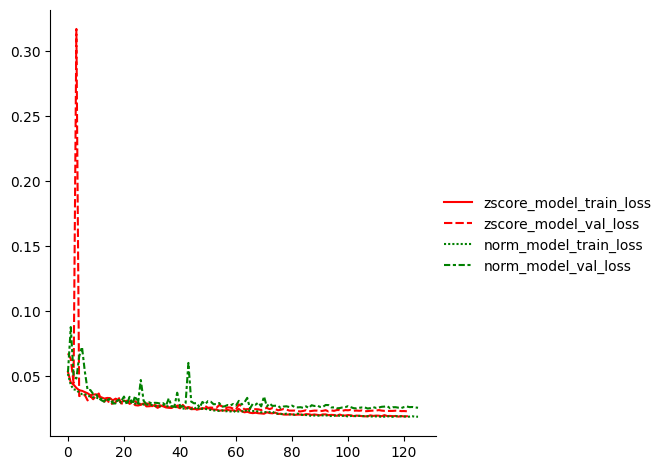

In [ ]:
import seaborn as sns
sns.relplot(data=loss_pd, kind='line', palette=['r','r','g','g'])

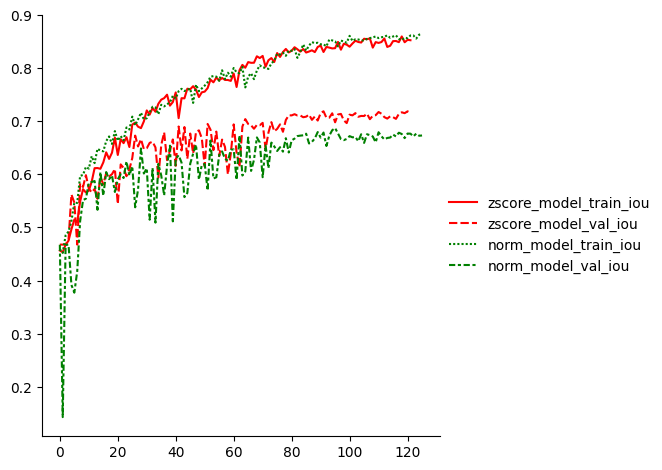

In [ ]:
sns.relplot(data=iou_pd, kind='line', palette=['r','r','g','g'])